In [1]:
import pandas as pd

# Load the dataset
file_path = 'Data/new_york_listings_2024.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [2]:
# Get the number of records and column names
num_records = len(df)
column_names = df.columns.tolist()

num_records, column_names

(20758,
 ['id',
  'name',
  'host_id',
  'host_name',
  'neighbourhood_group',
  'neighbourhood',
  'latitude',
  'longitude',
  'room_type',
  'price',
  'minimum_nights',
  'number_of_reviews',
  'last_review',
  'reviews_per_month',
  'calculated_host_listings_count',
  'availability_365',
  'number_of_reviews_ltm',
  'license',
  'rating',
  'bedrooms',
  'beds',
  'baths'])

In [3]:
# Display the data types of each column
data_types = df.dtypes

data_types

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [4]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
columns_with_missing_values = missing_values[missing_values > 0]

columns_with_missing_values

Series([], dtype: int64)

In [5]:
# Display the minimum and maximum prices
price_range = df['price'].agg(['min', 'max'])

price_range

min        10.0
max    100000.0
Name: price, dtype: float64

In [6]:
# Count the number of unique neighborhoods and neighborhood groups
num_unique_neighborhoods = df['neighbourhood'].nunique()
num_unique_neighborhood_groups = df['neighbourhood_group'].nunique()

num_unique_neighborhoods, num_unique_neighborhood_groups

(221, 5)

In [7]:
# Display the count of each room type
room_type_counts = df['room_type'].value_counts()

room_type_counts

Entire home/apt    11549
Private room        8804
Shared room          293
Hotel room           112
Name: room_type, dtype: int64

In [8]:
# Calculate the average reviews per month
avg_reviews_per_month = df['reviews_per_month'].mean()

avg_reviews_per_month

1.2579097215531363

In [9]:
# Count the number of listings with a license
listings_with_license = df['license'].notnull().sum()

# Display the distribution of ratings
rating_distribution = df['rating'].value_counts()

listings_with_license, rating_distribution

(20758,
 No rating    3593
 5.0          2882
 4.67          517
 4.75          469
 4.80          439
              ... 
 4.02            1
 3.42            1
 3.73            1
 3.26            1
 2.75            1
 Name: rating, Length: 162, dtype: int64)

In [10]:
# Count the number of unique hosts and calculate the average listings per host
num_unique_hosts = df['host_id'].nunique()
avg_listings_per_host = df.groupby('host_id')['id'].count().mean()

num_unique_hosts, avg_listings_per_host

(12449, 1.6674431681259538)

#### Visualize the distribution of listings in each neighborhood group using a bar plot.

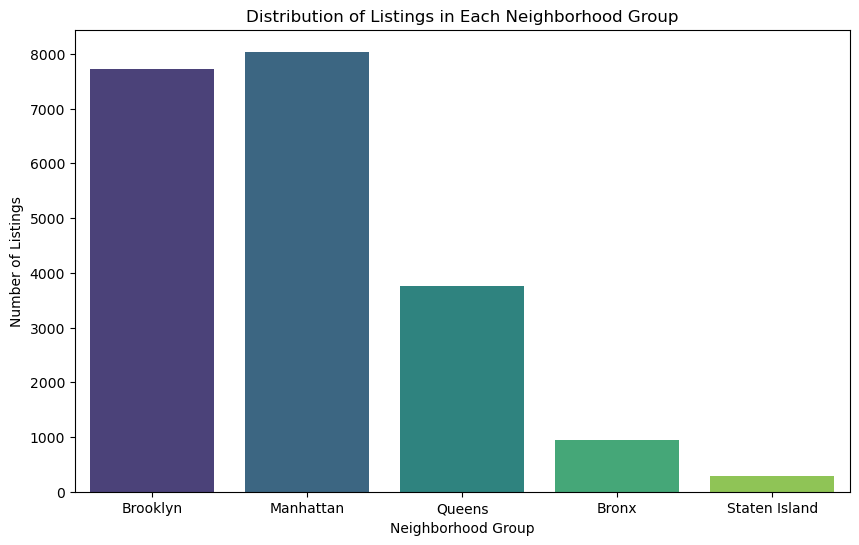

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for distribution of listings in each neighborhood group
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df, palette='viridis')
plt.title('Distribution of Listings in Each Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.show()

#### Visualize the distribution of room types using a bar plot.

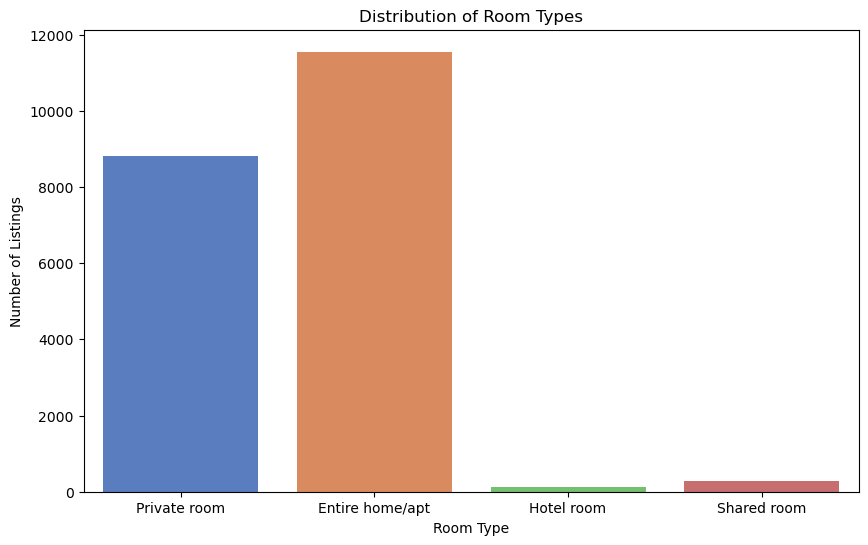

In [12]:
# Bar plot for distribution of room types
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df, palette='muted')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

#### Visualize the average price of listings in each neighborhood group using a bar plot.

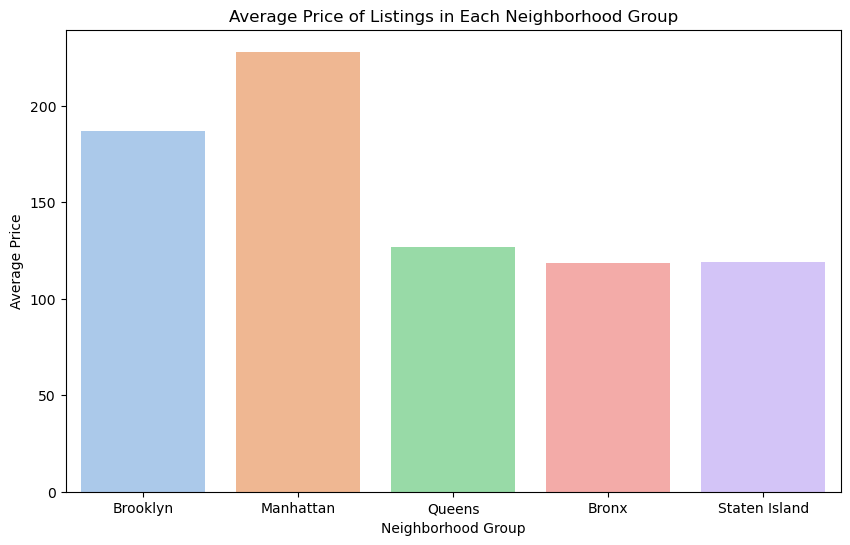

In [13]:
# Bar plot for average price of listings in each neighborhood group
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', data=df, palette='pastel', errorbar=None)
plt.title('Average Price of Listings in Each Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price')
plt.show()

#### Visualize the distribution of ratings using a bar plot.

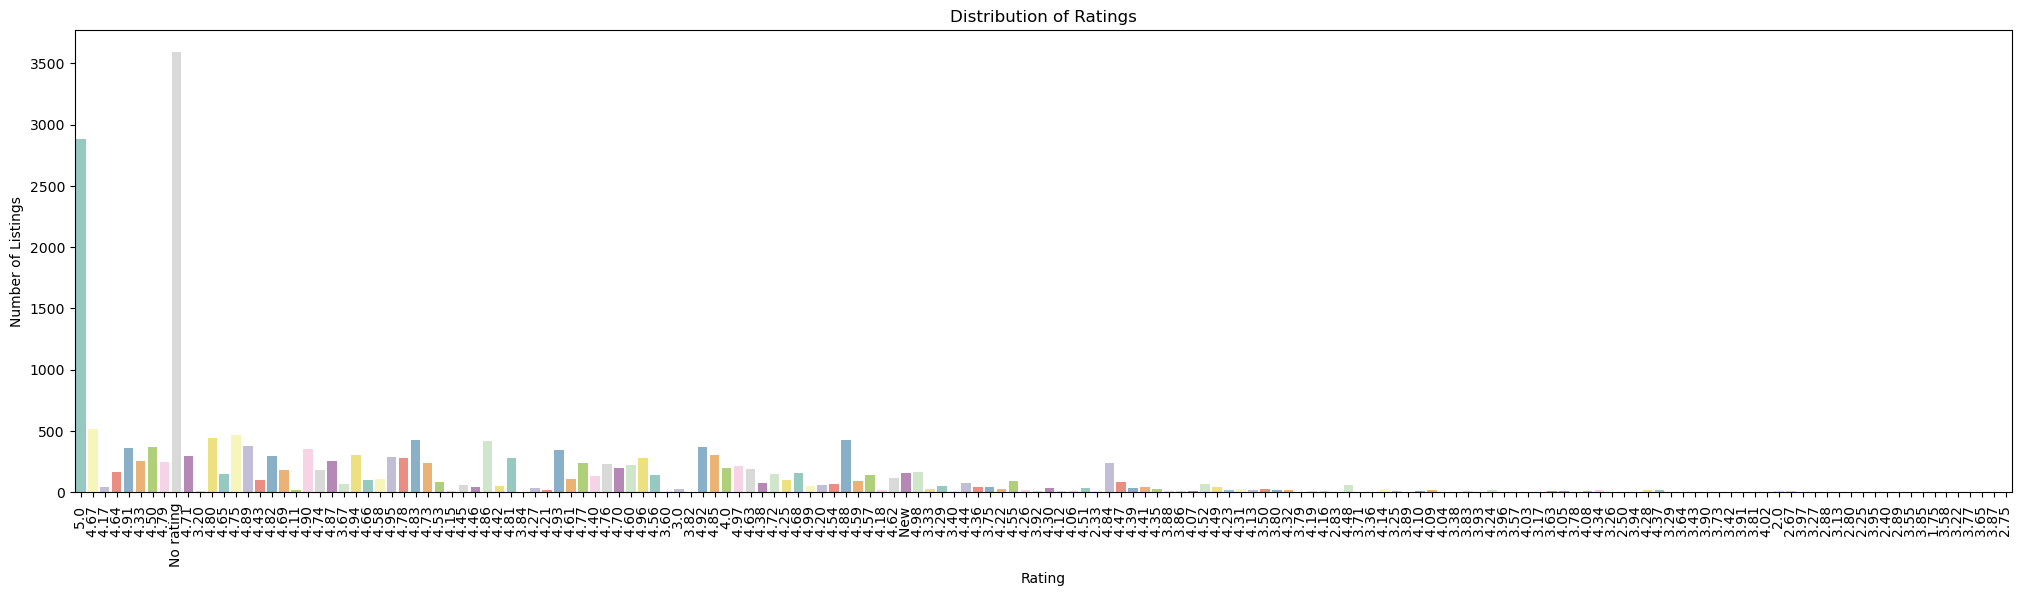

In [14]:
# Bar plot for distribution of ratings
plt.figure(figsize=(25, 6))
sns.countplot(x='rating', data=df, palette='Set3')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.xticks(rotation=90)
plt.ylabel('Number of Listings')
plt.show()

#### Visualize the distribution of listings in each neighborhood group.

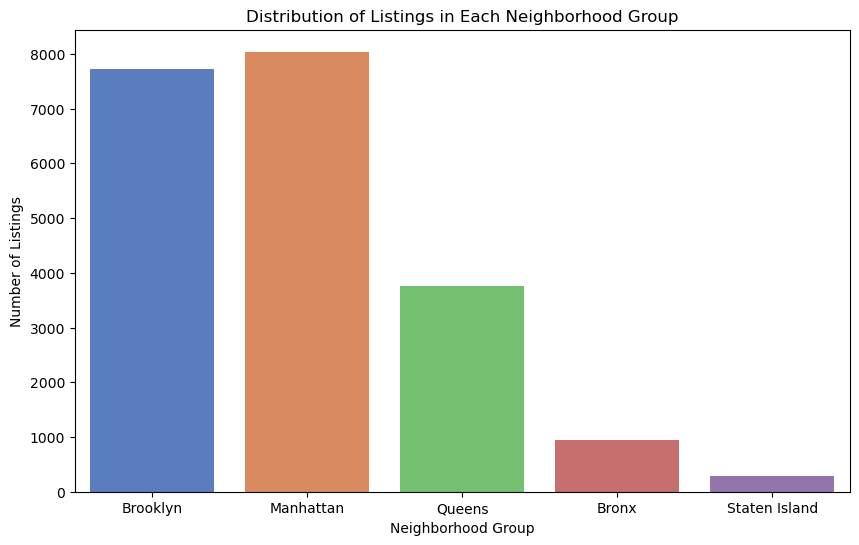

In [15]:
# Multi-colored plot for distribution of listings in each neighborhood group
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df, palette='muted')
plt.title('Distribution of Listings in Each Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.show()

#### Visualize the distribution of room types.

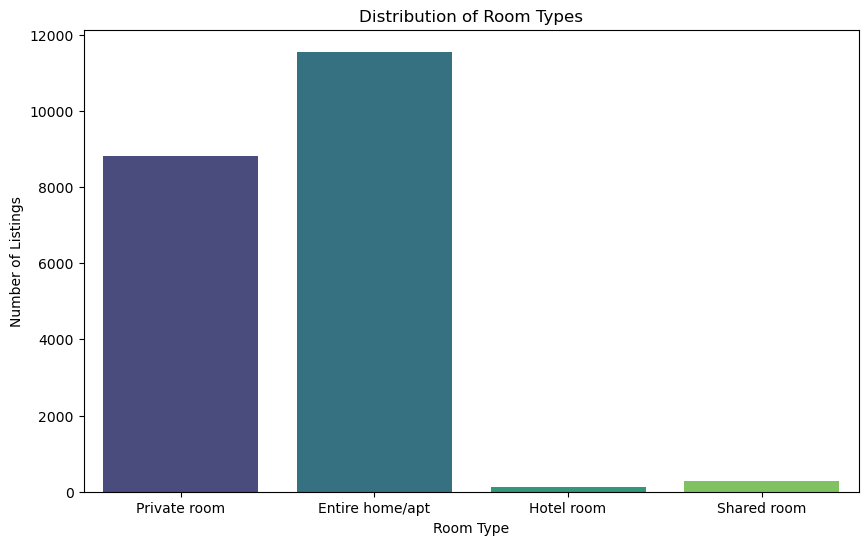

In [16]:
# Multi-colored plot for distribution of room types
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df, palette='viridis')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

#### What is the distribution of the number of bedrooms in the listings?

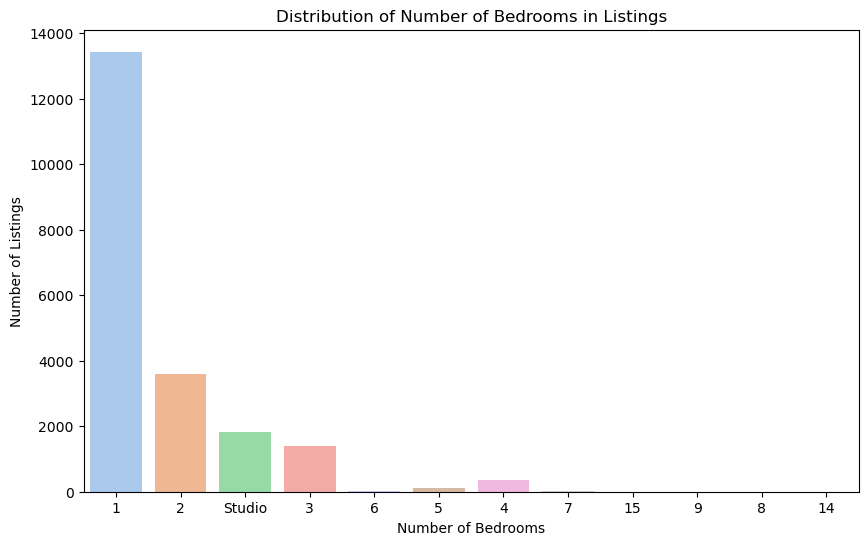

In [17]:
# Multi-colored plot for distribution of the number of bedrooms
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df, palette='pastel')
plt.title('Distribution of Number of Bedrooms in Listings')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Listings')
plt.show()

#### How does the average price vary for different types of beds in the listings?

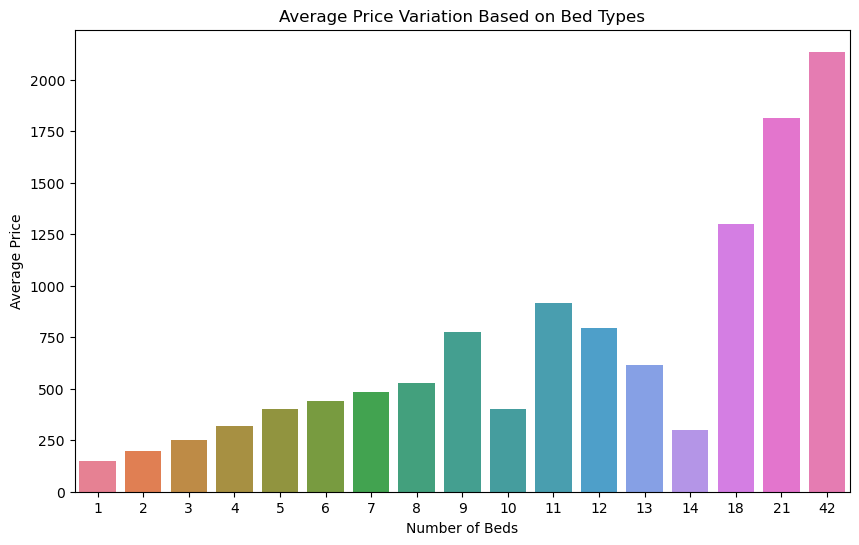

In [18]:
# Multi-colored plot for average price variation based on bed types
plt.figure(figsize=(10, 6))
sns.barplot(x='beds', y='price', data=df, palette='husl', errorbar=None)
plt.title('Average Price Variation Based on Bed Types')
plt.xlabel('Number of Beds')
plt.ylabel('Average Price')
plt.show()

#### What is the distribution of minimum nights required for booking a listing?

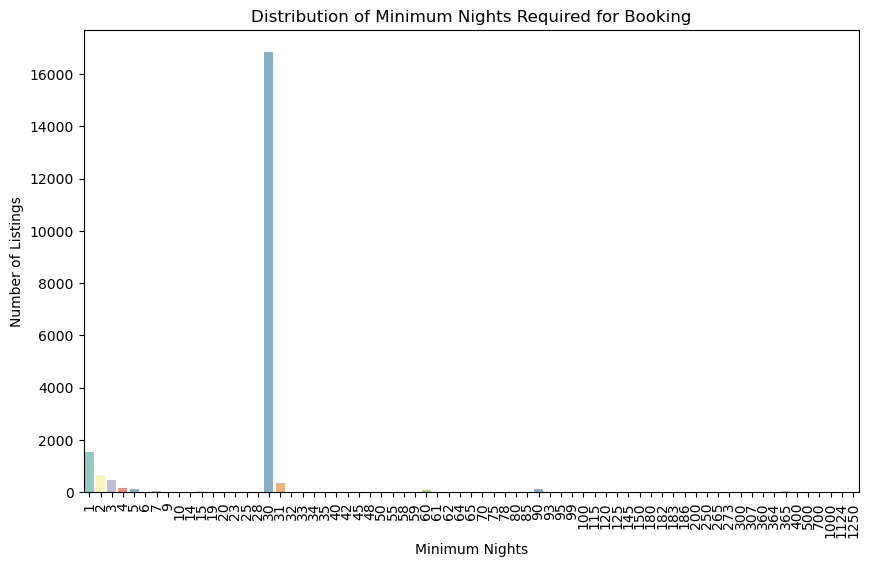

In [19]:
# Multi-colored plot for distribution of minimum nights required
plt.figure(figsize=(10, 6))
sns.countplot(x='minimum_nights', data=df, palette='Set3')
plt.title('Distribution of Minimum Nights Required for Booking')
plt.xlabel('Minimum Nights')
plt.xticks(rotation=90)
plt.ylabel('Number of Listings')
plt.show()

#### How many listings have a specified license, and what is the distribution of prices for these listings?

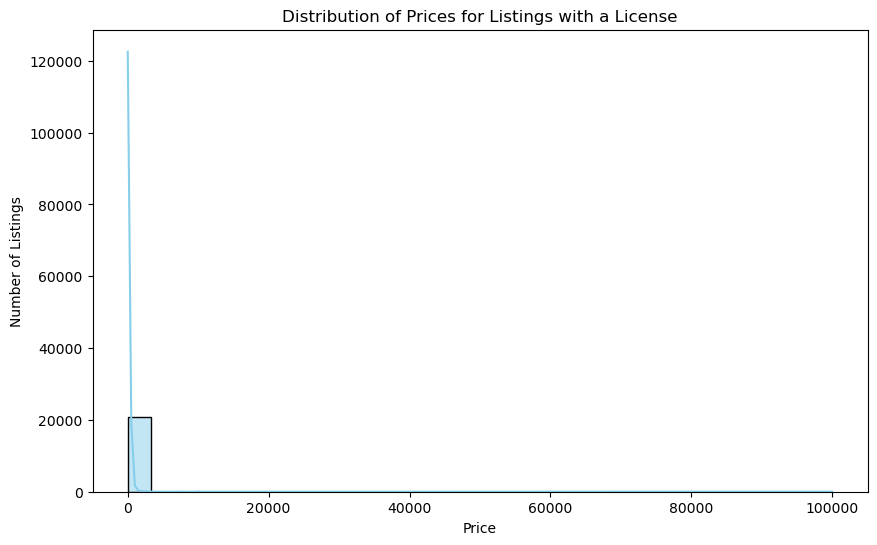

In [20]:
# Multi-colored plot for distribution of prices for listings with a license
plt.figure(figsize=(10, 6))
sns.histplot(x='price', data=df[df['license'].notnull()], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Prices for Listings with a License')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.show()

#### What is the distribution of the number of listings per host?

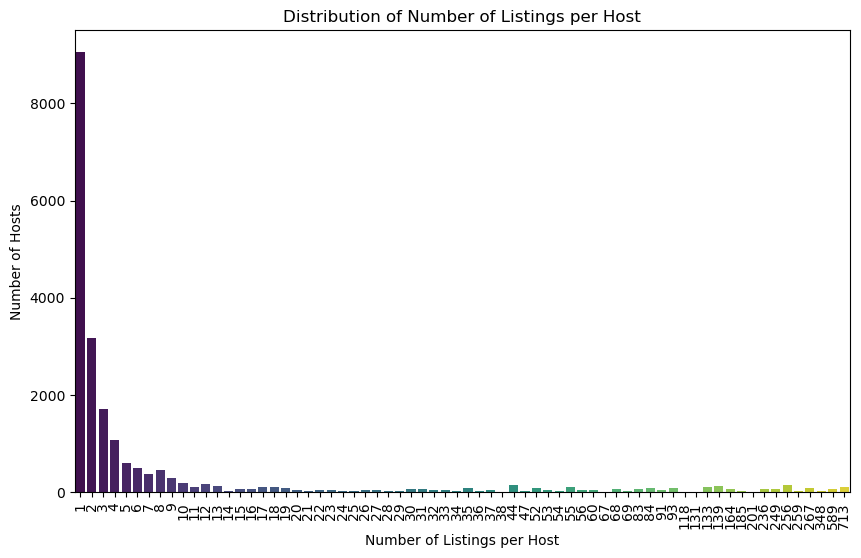

In [21]:
# Multi-colored plot for distribution of the number of listings per host
plt.figure(figsize=(10, 6))
sns.countplot(x='calculated_host_listings_count', data=df, palette='viridis')
plt.title('Distribution of Number of Listings per Host')
plt.xlabel('Number of Listings per Host')
plt.xticks(rotation=90)
plt.ylabel('Number of Hosts')
plt.show()

#### How does the price of listings correlate with the number of reviews they have received?

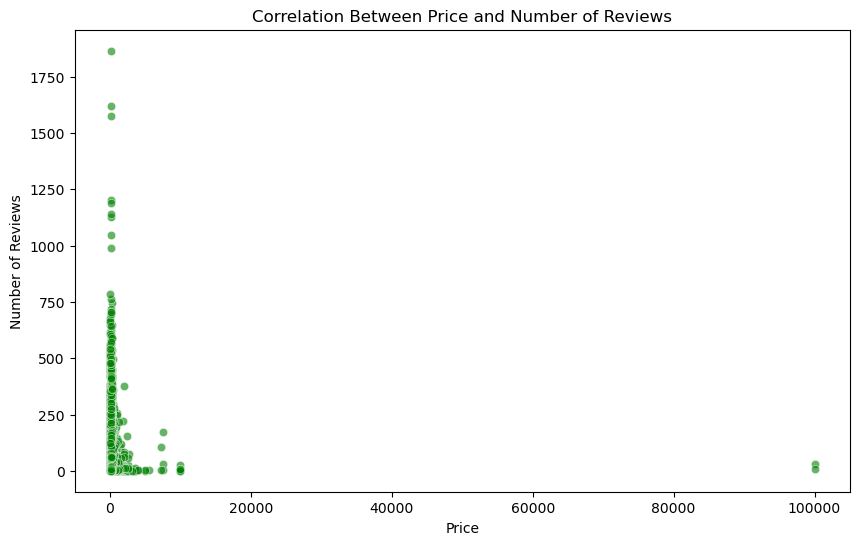

In [22]:
# Scatterplot for the correlation between price and number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=df, alpha=0.6, color='green')
plt.title('Correlation Between Price and Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

#### Is there any noticeable relationship between the availability of listings and the number of bedrooms?

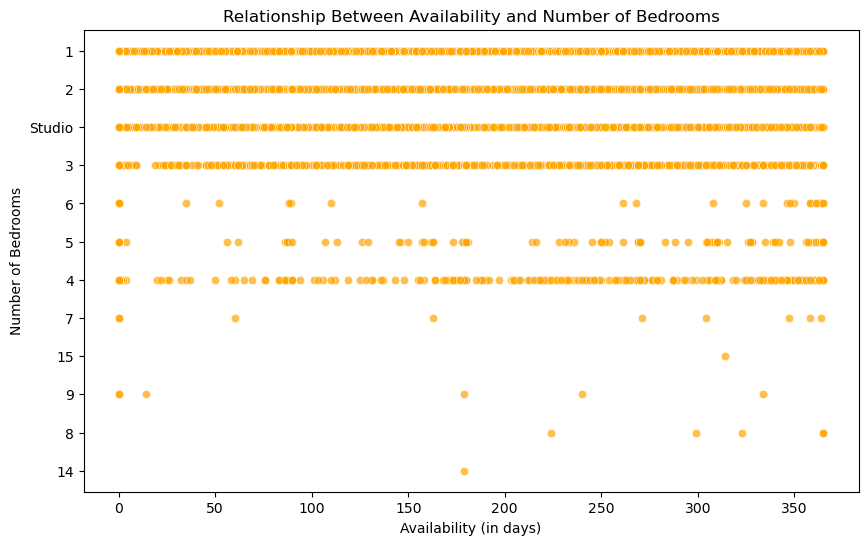

In [23]:
# Scatterplot for the relationship between availability and number of bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='availability_365', y='bedrooms', data=df, alpha=0.7, color='orange')
plt.title('Relationship Between Availability and Number of Bedrooms')
plt.xlabel('Availability (in days)')
plt.ylabel('Number of Bedrooms')
plt.show()

#### How does the average price vary based on the number of beds in the listings?

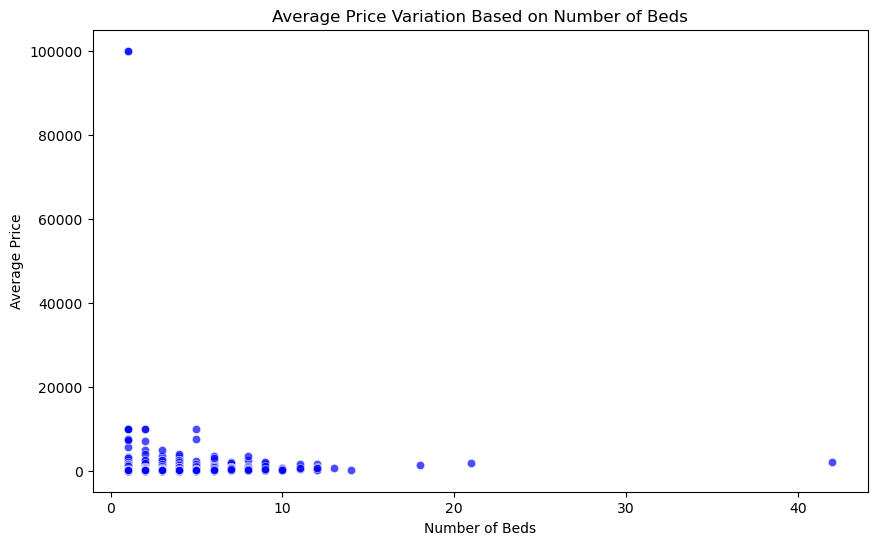

In [24]:
# Scatterplot for average price variation based on number of beds
plt.figure(figsize=(10, 6))
sns.scatterplot(x='beds', y='price', data=df, alpha=0.7, color='blue')
plt.title('Average Price Variation Based on Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Average Price')
plt.show()

#### Is there a relationship between the number of reviews and the rating of listings?

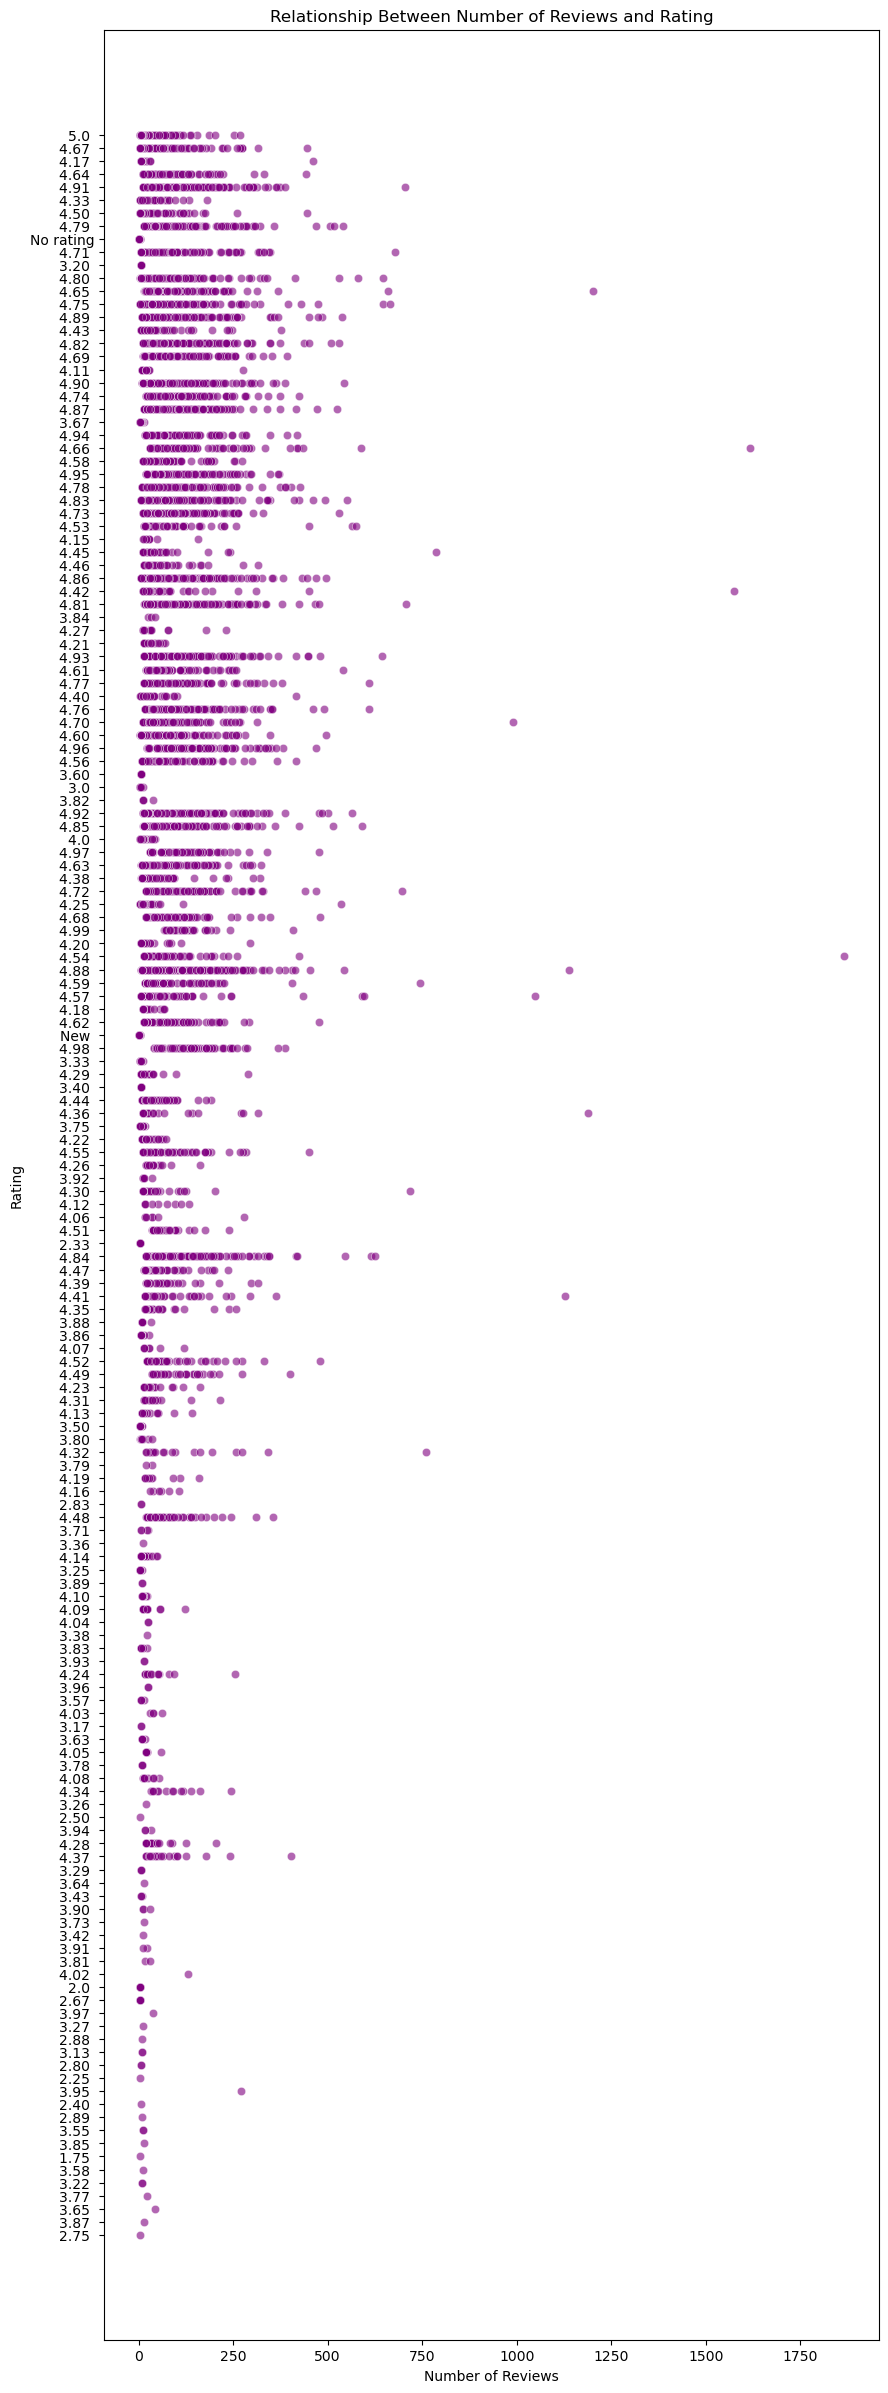

In [25]:
# Scatterplot for the relationship between number of reviews and rating
plt.figure(figsize=(10, 30))
sns.scatterplot(x='number_of_reviews', y='rating', data=df, alpha=0.6, color='purple')
plt.title('Relationship Between Number of Reviews and Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

#### How is the distribution of ratings among listings with different numbers of bedrooms?

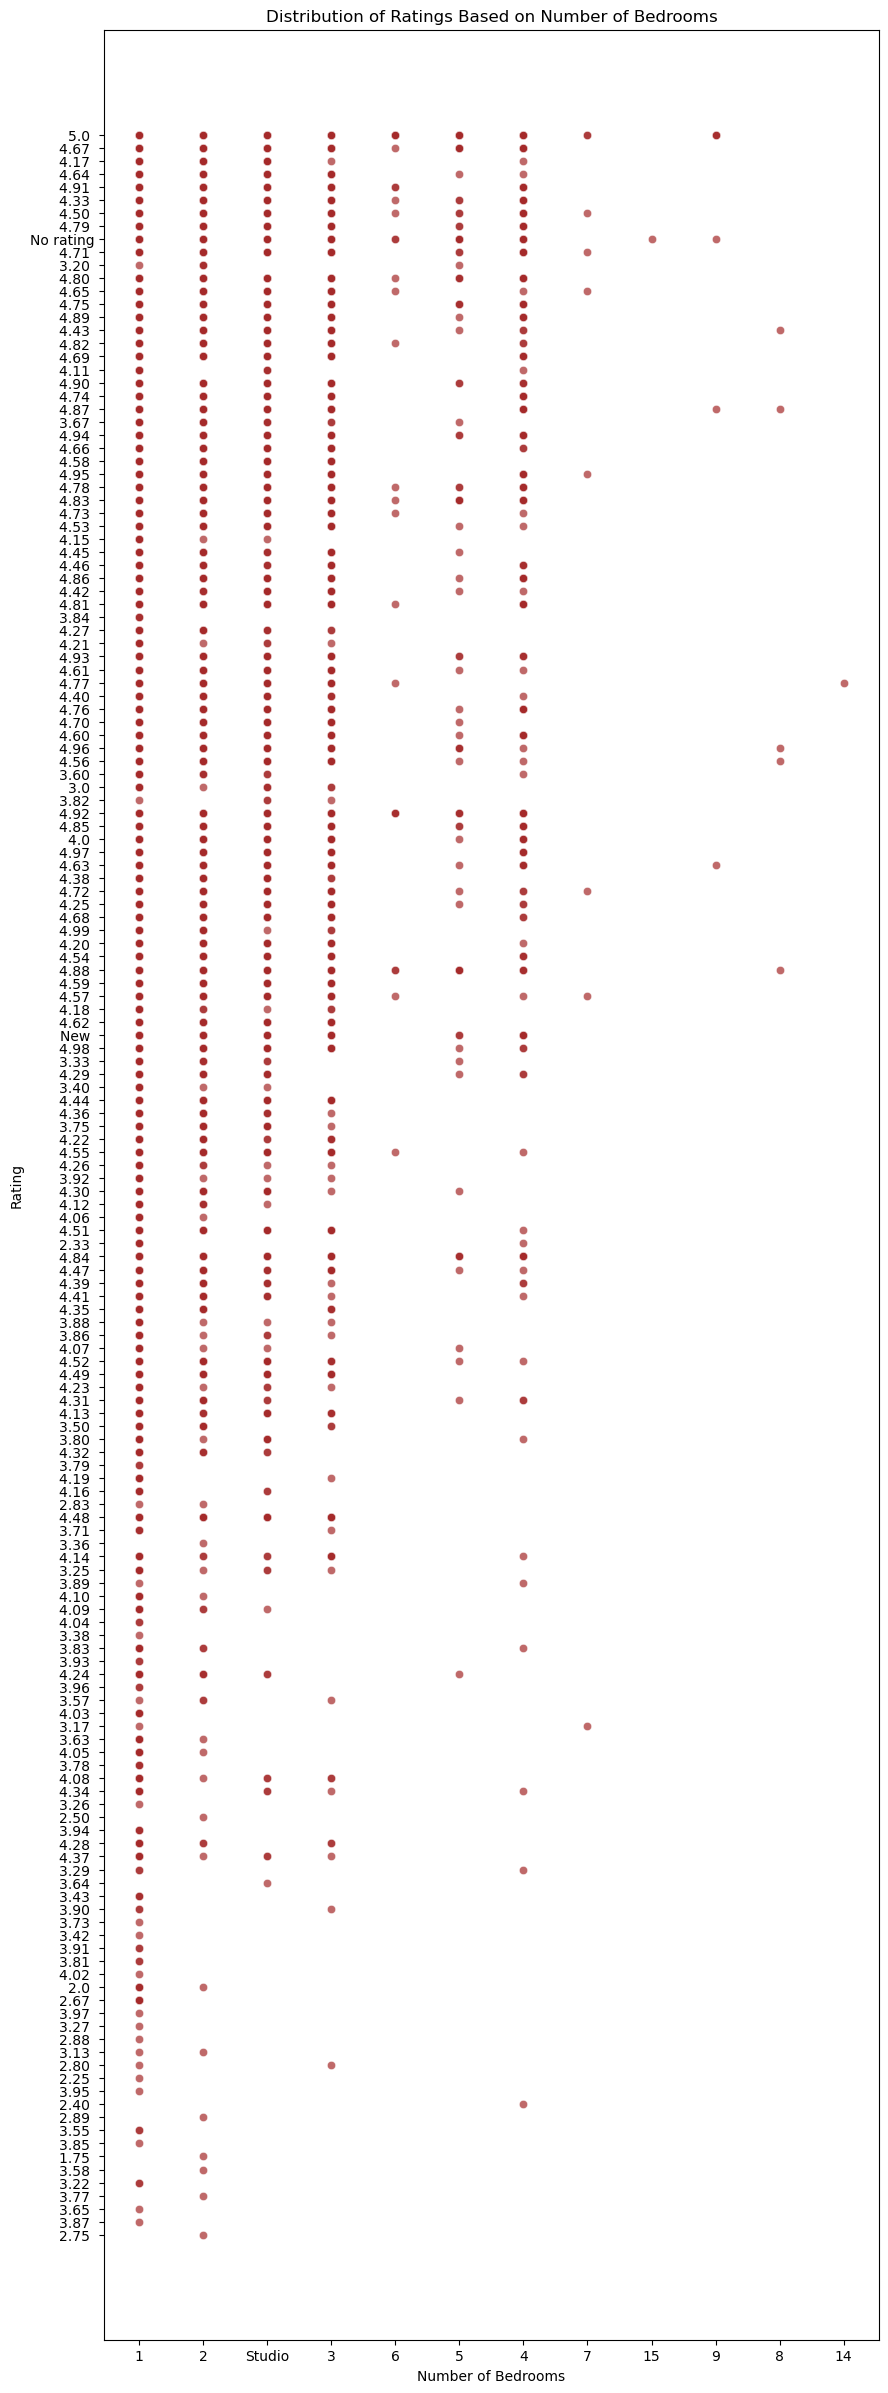

In [26]:
# Scatterplot for the distribution of ratings based on number of bedrooms
plt.figure(figsize=(10, 30))
sns.scatterplot(x='bedrooms', y='rating', data=df, alpha=0.7, color='brown')
plt.title('Distribution of Ratings Based on Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rating')
plt.show()

#### Is there a relationship between the number of beds and the number of reviews per month for listings?

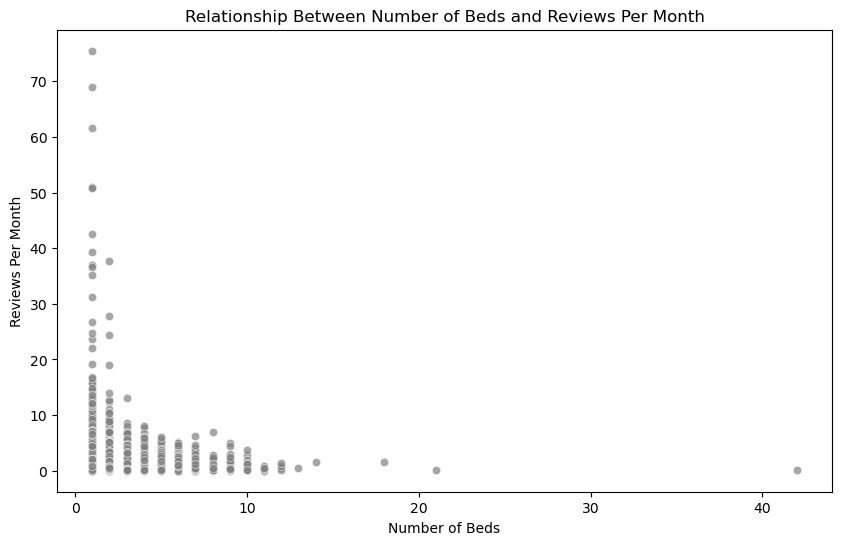

In [27]:
# Scatterplot for the relationship between number of beds and reviews per month
plt.figure(figsize=(10, 6))
sns.scatterplot(x='beds', y='reviews_per_month', data=df, alpha=0.7, color='gray')
plt.title('Relationship Between Number of Beds and Reviews Per Month')
plt.xlabel('Number of Beds')
plt.ylabel('Reviews Per Month')
plt.show()

#### How does the availability of listings vary based on the average rating they have received?

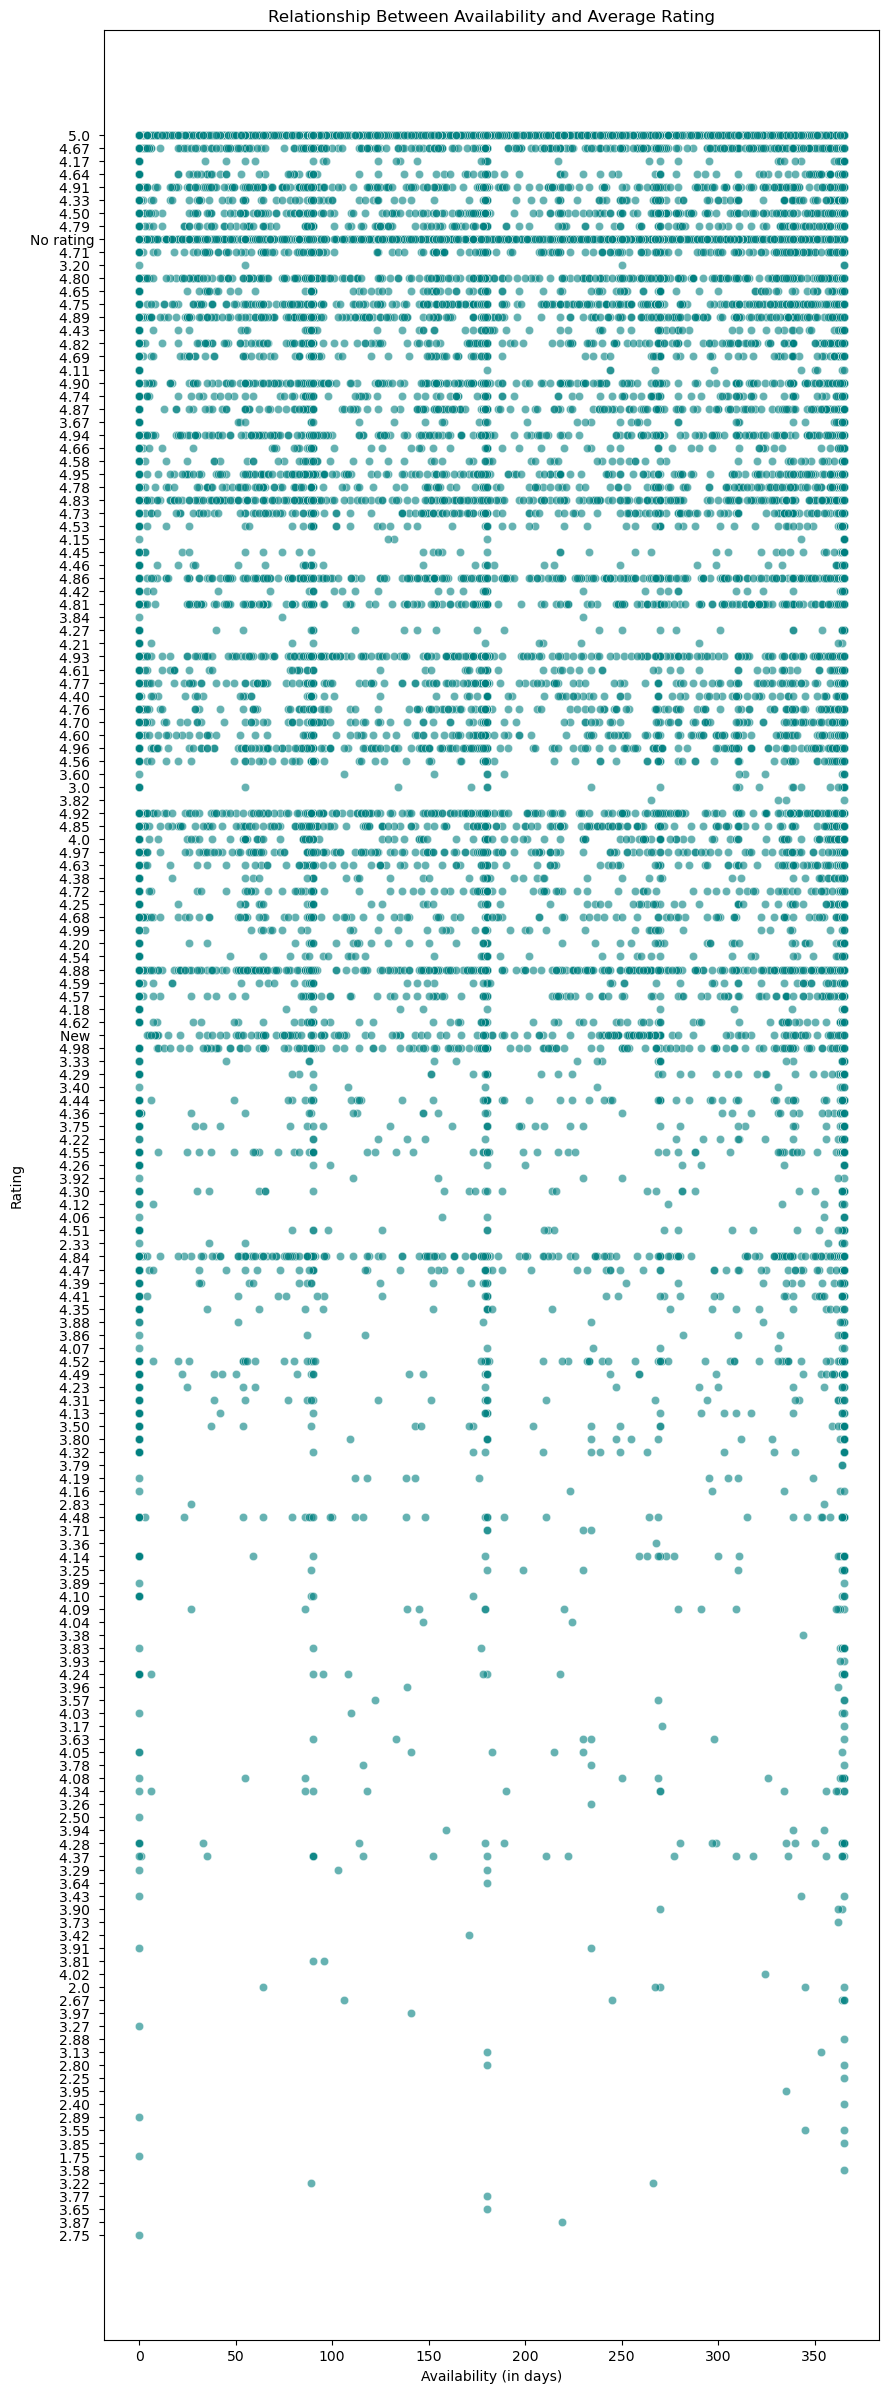

In [28]:
# Scatterplot for the relationship between availability and average rating
plt.figure(figsize=(10, 30))
sns.scatterplot(x='availability_365', y='rating', data=df, alpha=0.6, color='teal')
plt.title('Relationship Between Availability and Average Rating')
plt.xlabel('Availability (in days)')
plt.ylabel('Rating')
plt.show()

#### How does the minimum nights required for booking correlate with the number of beds in the listings?

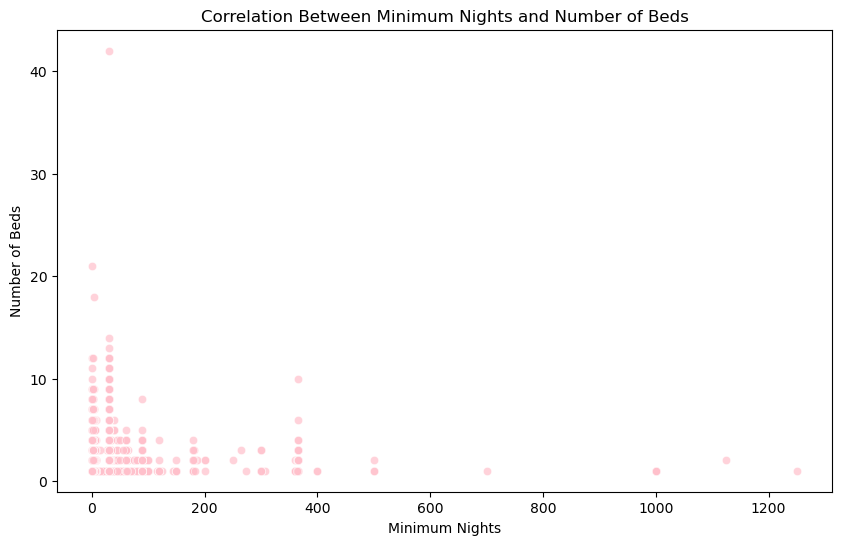

In [29]:
# Scatterplot for the correlation between minimum nights and number of beds
plt.figure(figsize=(10, 6))
sns.scatterplot(x='minimum_nights', y='beds', data=df, alpha=0.7, color='pink')
plt.title('Correlation Between Minimum Nights and Number of Beds')
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Beds')
plt.show()

#### Create a heatmap to visualize the correlation matrix of numerical features in the dataset.

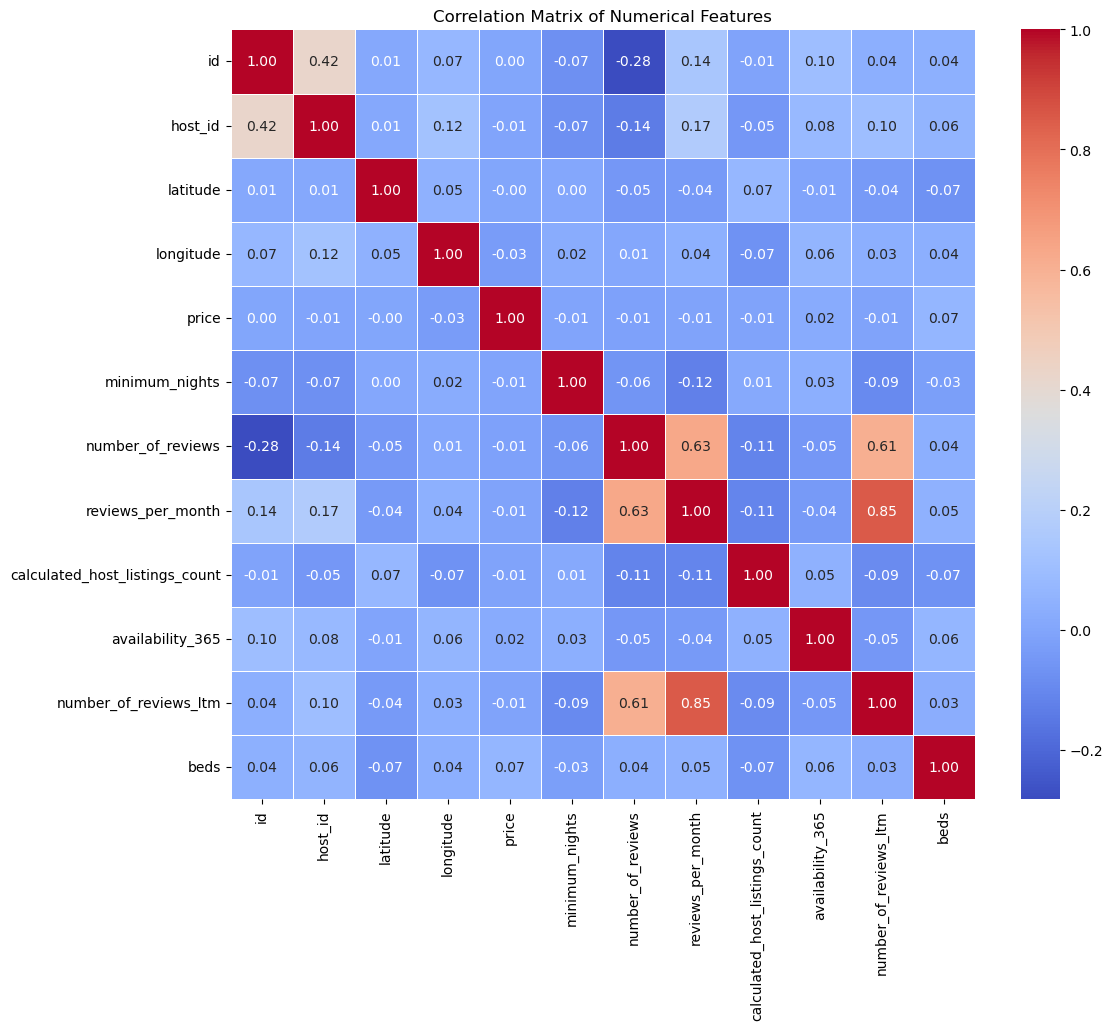

In [30]:
# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
